## Linear Regression

Example in Excel

<video controls src="regression.mp4" />




The short video show a verey simple example of Linear Regression using Excel.

The values for the feature and taget are all generated using random numbers, however a loose relationship between the two (i.e how thay are calculatted has been maintained.

The values are re-generated by hitting F9

In a real Linear Regression situation there are likely to be many features, not just one. 

What our simple example has in common with a more realistic case is that we would be aiming to predict
the target value from a set of features (in this case a set of one)

Excel illustrates how it would make the prediction by inserting a 'best fit' line through the points. 
We will discuss best fit a bit later.

You can also have Excel write out the equation of the line it has drawn. This is essentially the Linear Regression model that 
it has calculated.

Two things should be immediately obvious;

1. Almost non-of the real points lay on the line
2. As the data points change, the line and the equation changes


**Conclusion: Exercise!**

## Supervised learning

In order to get Excel to produce a model at all we neded to provide both feature(s) values and target values

That is we need to provide features for which we already know the answers. By providing both the feateres and the associated Target values in this way, we allow a model to be trained so as to predict target values (which we didn't know) from new set of features which we did. 

This is called Supervised learning


## The dataset 

For this lesson we will use a dataset which is included with the scikit package.

The dataset that we will be using is the **Boston House prices** dataset.

The datasets in scikit are provided as Dictionary objects. This allows both the data and appropriate metadata, including provenance and citation information to be included.

You can see the contents of the dictionary with the following code


In [5]:
# Dataset  - Boston house-prices from sklearn

from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()

#print(boston_data)

print(boston_data['DESCR'])


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [2]:
# we can put the data (the features) into a dataframe and add the 'target values'
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# how big is the dataset?
df_boston.shape

(506, 14)

In [4]:
# stats on the numerical values
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Missing data

Most machine learning algorithms don't like missing data. 

In this particular case we don't have any, but if there was we could adopt standard approaches to either removing such rows or imputing the missing values.

The following code is just examples of what you might do.

In [6]:
df_missing = pd.read_csv("MissingData.csv")

In [7]:
# The missing values in a dataframe are represented by 'NaN' 
df_missing

,NumA,NumB,CatA
0,2.885235,67.0,Yellow
1,NaN,56.0,Green
2,2.767411,65.0,Green
3,6.881359,62.0,NaN
4,7.708499,61.0,Blue
5,6.255481,70.0,Yellow
6,3.957399,56.0,Blue
7,8.085115,71.0,Yellow
8,2.939679,56.0,Blue
9,NaN,NaN,Blue


In [8]:
# we can 'drop' all of the rows containing a NaN with

print(df_missing.shape)
df_missing.dropna(inplace=True)
print(df_missing.shape)

(20, 3)
(13, 3)


In [ ]:
# a 35% reduction in data!

In [9]:
df_missing = pd.read_csv("MissingData.csv")
df_missing = df_missing.fillna(df_missing.mean())
df_missing

,NumA,NumB,CatA
0,2.885235,67.000000,Yellow
1,5.095410,56.000000,Green
2,2.767411,65.000000,Green
3,6.881359,62.000000,NaN
4,7.708499,61.000000,Blue
5,6.255481,70.000000,Yellow
6,3.957399,56.000000,Blue
7,8.085115,71.000000,Yellow
8,2.939679,56.000000,Blue
9,5.095410,66.352941,Blue


In [10]:
df_missing = pd.read_csv("MissingData.csv")
df_missing['CatA'].fillna('Unknown', inplace = True)
df_missing

,NumA,NumB,CatA
0,2.885235,67.0,Yellow
1,NaN,56.0,Green
2,2.767411,65.0,Green
3,6.881359,62.0,Unknown
4,7.708499,61.0,Blue
5,6.255481,70.0,Yellow
6,3.957399,56.0,Blue
7,8.085115,71.0,Yellow
8,2.939679,56.0,Blue
9,NaN,NaN,Blue


# Visualisation of the data

We are looking for insights as to the nature of the data as a whole.  We can use different visualizations for different types of data.

We will use matplotlib for our visualizations

In [11]:
# only need the pyplot functions
import matplotlib.pyplot as plt

# needed by jupyter to ensure that the plots appear inline (in the usual output cell)
%matplotlib inline

In [12]:
# remind ourselves what our dataset looks like
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### We can create simple plots to look at the  data

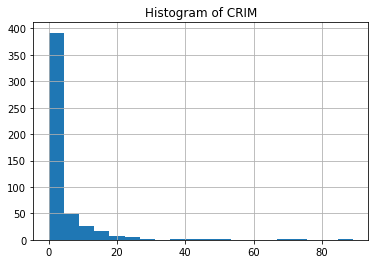

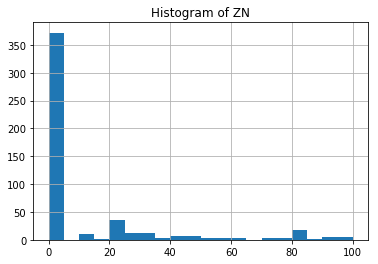

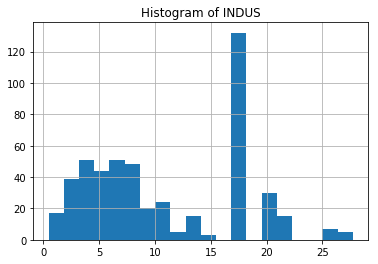

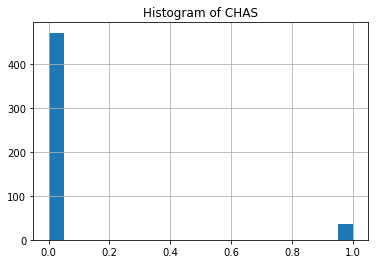

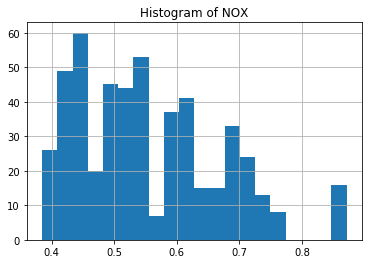

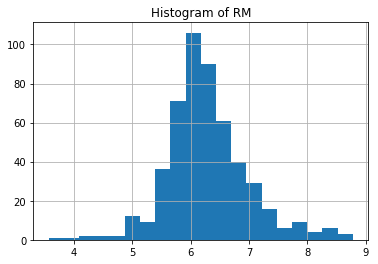

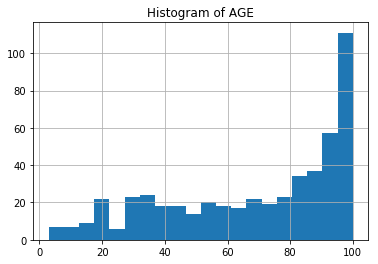

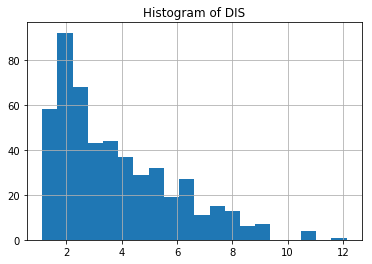

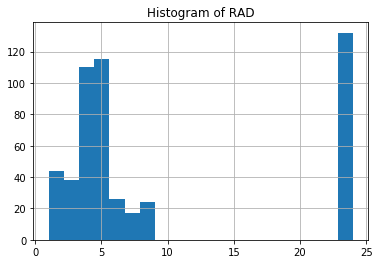

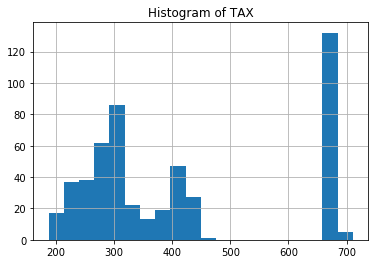

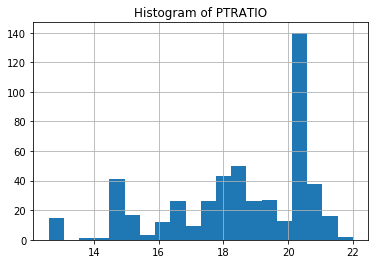

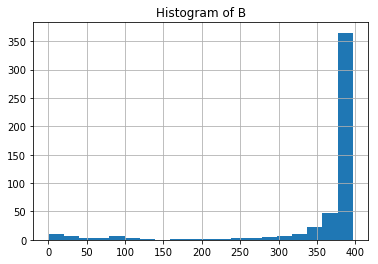

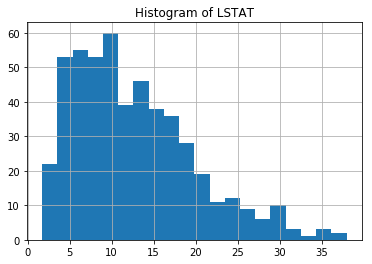

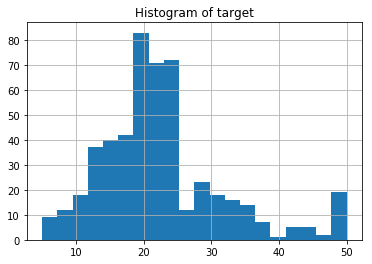

In [13]:
# both histograms ...
for col in df_boston.columns:
    df_boston[col].hist(bins = 20)
    plt.title('Histogram of ' + col)
    plt.show() 

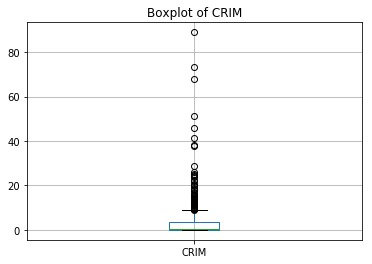

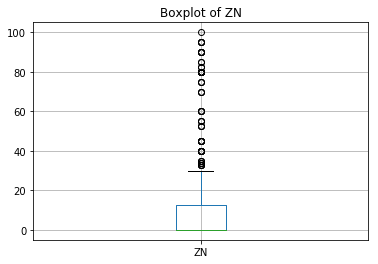

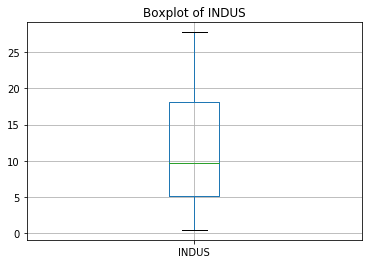

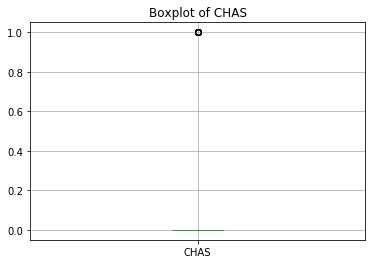

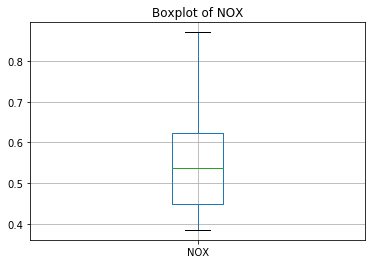

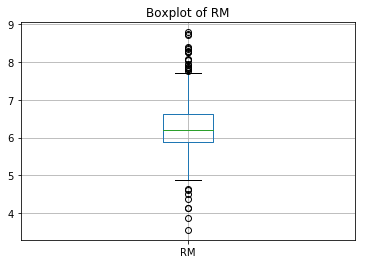

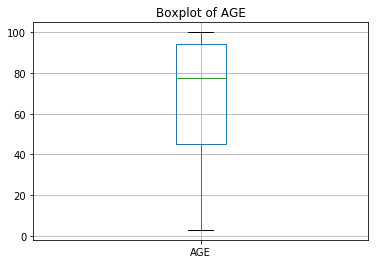

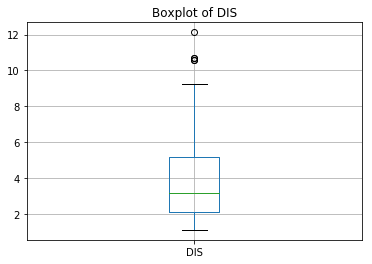

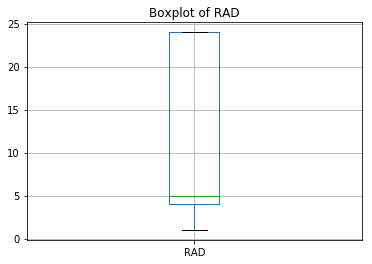

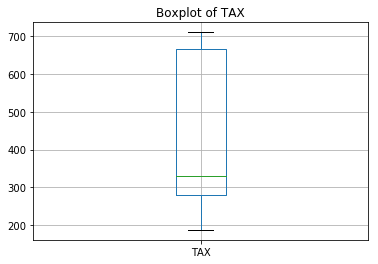

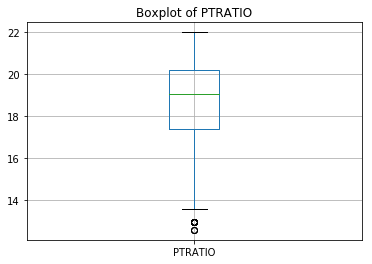

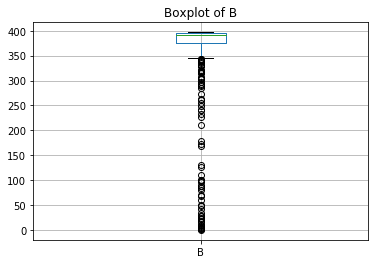

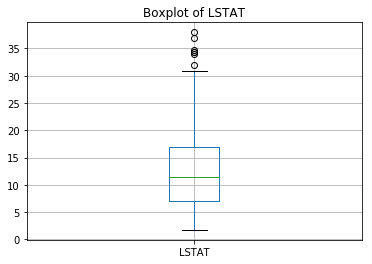

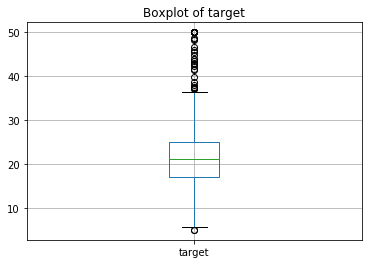

In [14]:
#  ...   and boxplots can be useful

for col in df_boston.columns:
    df_boston.boxplot(column = col)
    plt.title('Boxplot of ' + col)
    plt.show() 


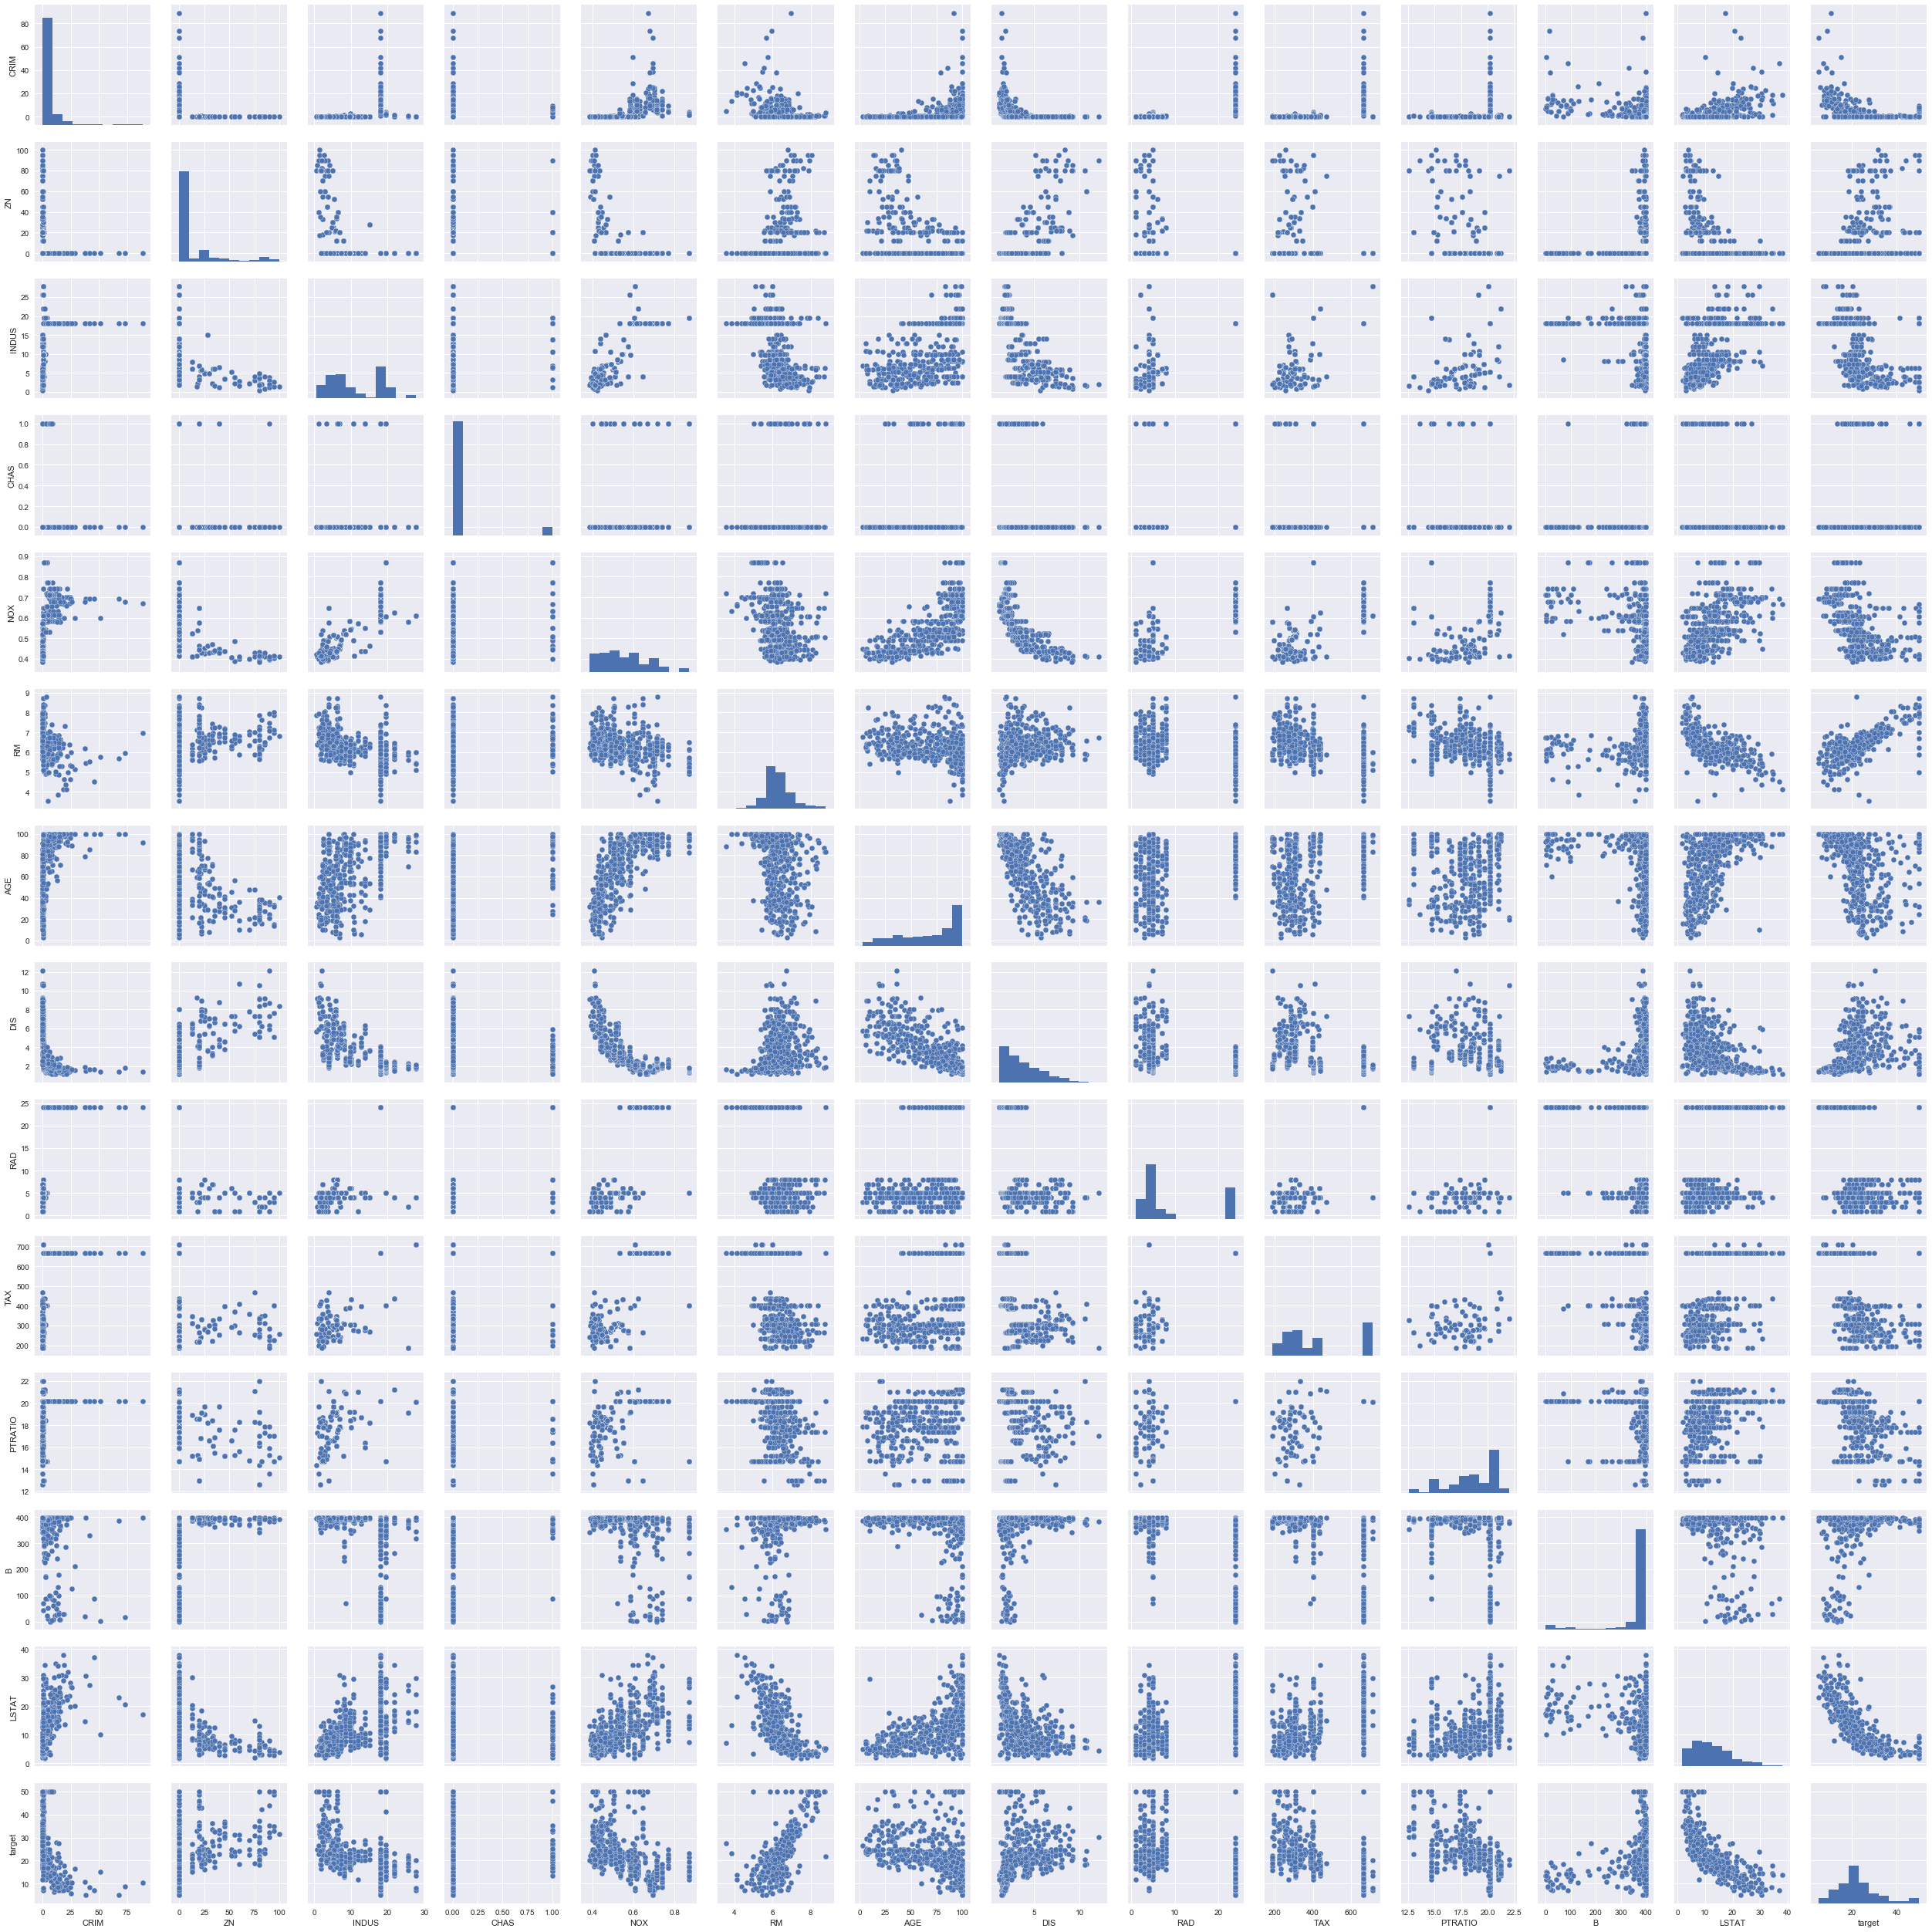

In [15]:
# variable correlations
import seaborn as sns
sns.pairplot(df_boston)
plt.show()

In [16]:
# we can look at the correlation between each pair of variables

corr = df_boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


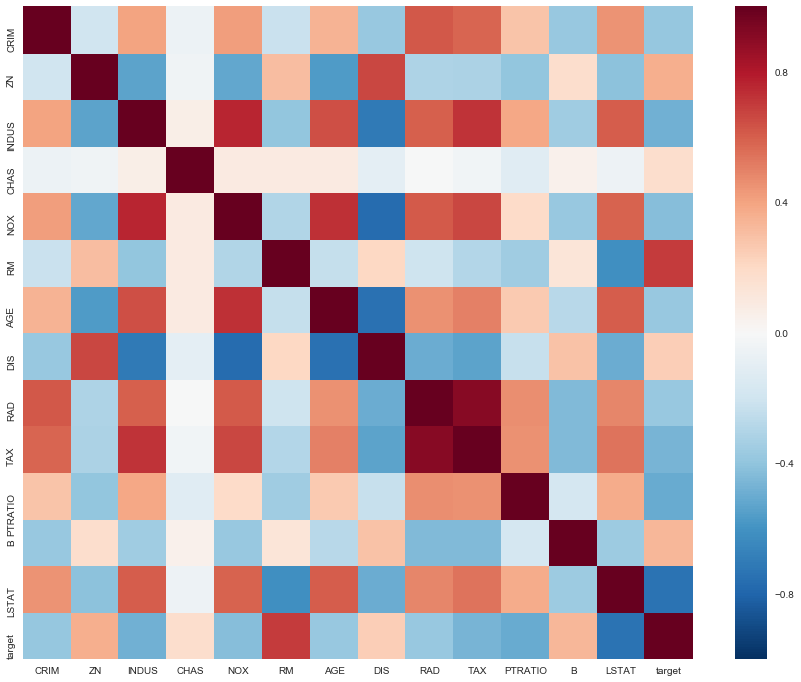

In [17]:
# or graphically with a heatmap 
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,12))
heat_map = sns.heatmap(corr)
plt.show()

# Dealing with outliers

[Demonstration using Excel of the effect of Outliers ]

<video controls src="regression_outliers.mp4" />

From the demonstration you can see that outliers can distort considerably the position of the trendline. This is not desirable.

For a given set of values there is no real definition of which are outliers. A common approach is to consider any value outside of 2 standard deviations of the mean could be considered an outlier.

We will adopt this approach and write a function which will list all of the rows in the dataset which contain such values.

In [19]:
# We start by creating a list of the columns which could contain outliers.
# In our dataset it is all of the columns with the exception of the Target column and the Chas
# column which we know from the description is a categorical boolean value.

poss_outlier_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']



If you go back and look at the .describe values for the CHAS column you can see that if we included it in this approach, we would effectively remove all of the 1 valued rows.

In [20]:
# A common approach to removing outliers is to treat all data outside of 2 standard deviations of the mean as outliers
# We will create a small function to do this and then passs it our dataframe and our list of columns

def get_outliers(data, columns) :
    # create a list for the results
    outlier_list = []
    for col in columns:
        mean = data[col].mean()
        sd = data[col].std()
        # get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers = data[(data[col] > mean + 2*sd) | (data[col]  < mean  - 2*sd)].index
        # and add those values to our list
        outlier_list  += [x for x in outliers]
        # put our list into a set, as this will remove duplicates
        # and then return it as a list
    return list(set(outlier_list))

# creat our list of outlier row indexes
boston_outliers = get_outliers(df_boston, poss_outlier_columns)

# and then drop them
df_boston = df_boston.drop(boston_outliers, axis = 0)


In [21]:
df_boston.shape

(336, 14)

In [22]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,2.111111,6.190476,10.750268,0.077381,0.542165,6.238696,69.090476,3.748357,9.187500,396.678571,18.771131,381.692679,11.881250,22.303869
std,3.760259,13.150428,6.008456,0.267593,0.092797,0.472430,25.381960,1.662078,8.340011,160.267792,1.829534,30.429544,5.220547,7.063001
min,0.006320,0.000000,1.520000,0.000000,0.389000,4.963000,13.000000,1.129600,1.000000,193.000000,14.700000,179.360000,1.730000,7.200000
25%,0.086962,0.000000,5.935000,0.000000,0.464000,5.913750,47.800000,2.421750,4.000000,281.000000,17.600000,382.160000,7.737500,18.475000
50%,0.223250,0.000000,8.560000,0.000000,0.524000,6.183500,73.700000,3.421400,5.000000,307.000000,19.100000,393.330000,11.330000,21.400000
75%,2.256870,0.000000,18.100000,0.000000,0.605000,6.499000,92.600000,4.781350,8.000000,437.000000,20.200000,396.900000,15.430000,24.425000
max,19.609100,55.000000,21.890000,1.000000,0.770000,7.686000,100.000000,7.980900,24.000000,666.000000,21.200000,396.900000,26.400000,50.000000


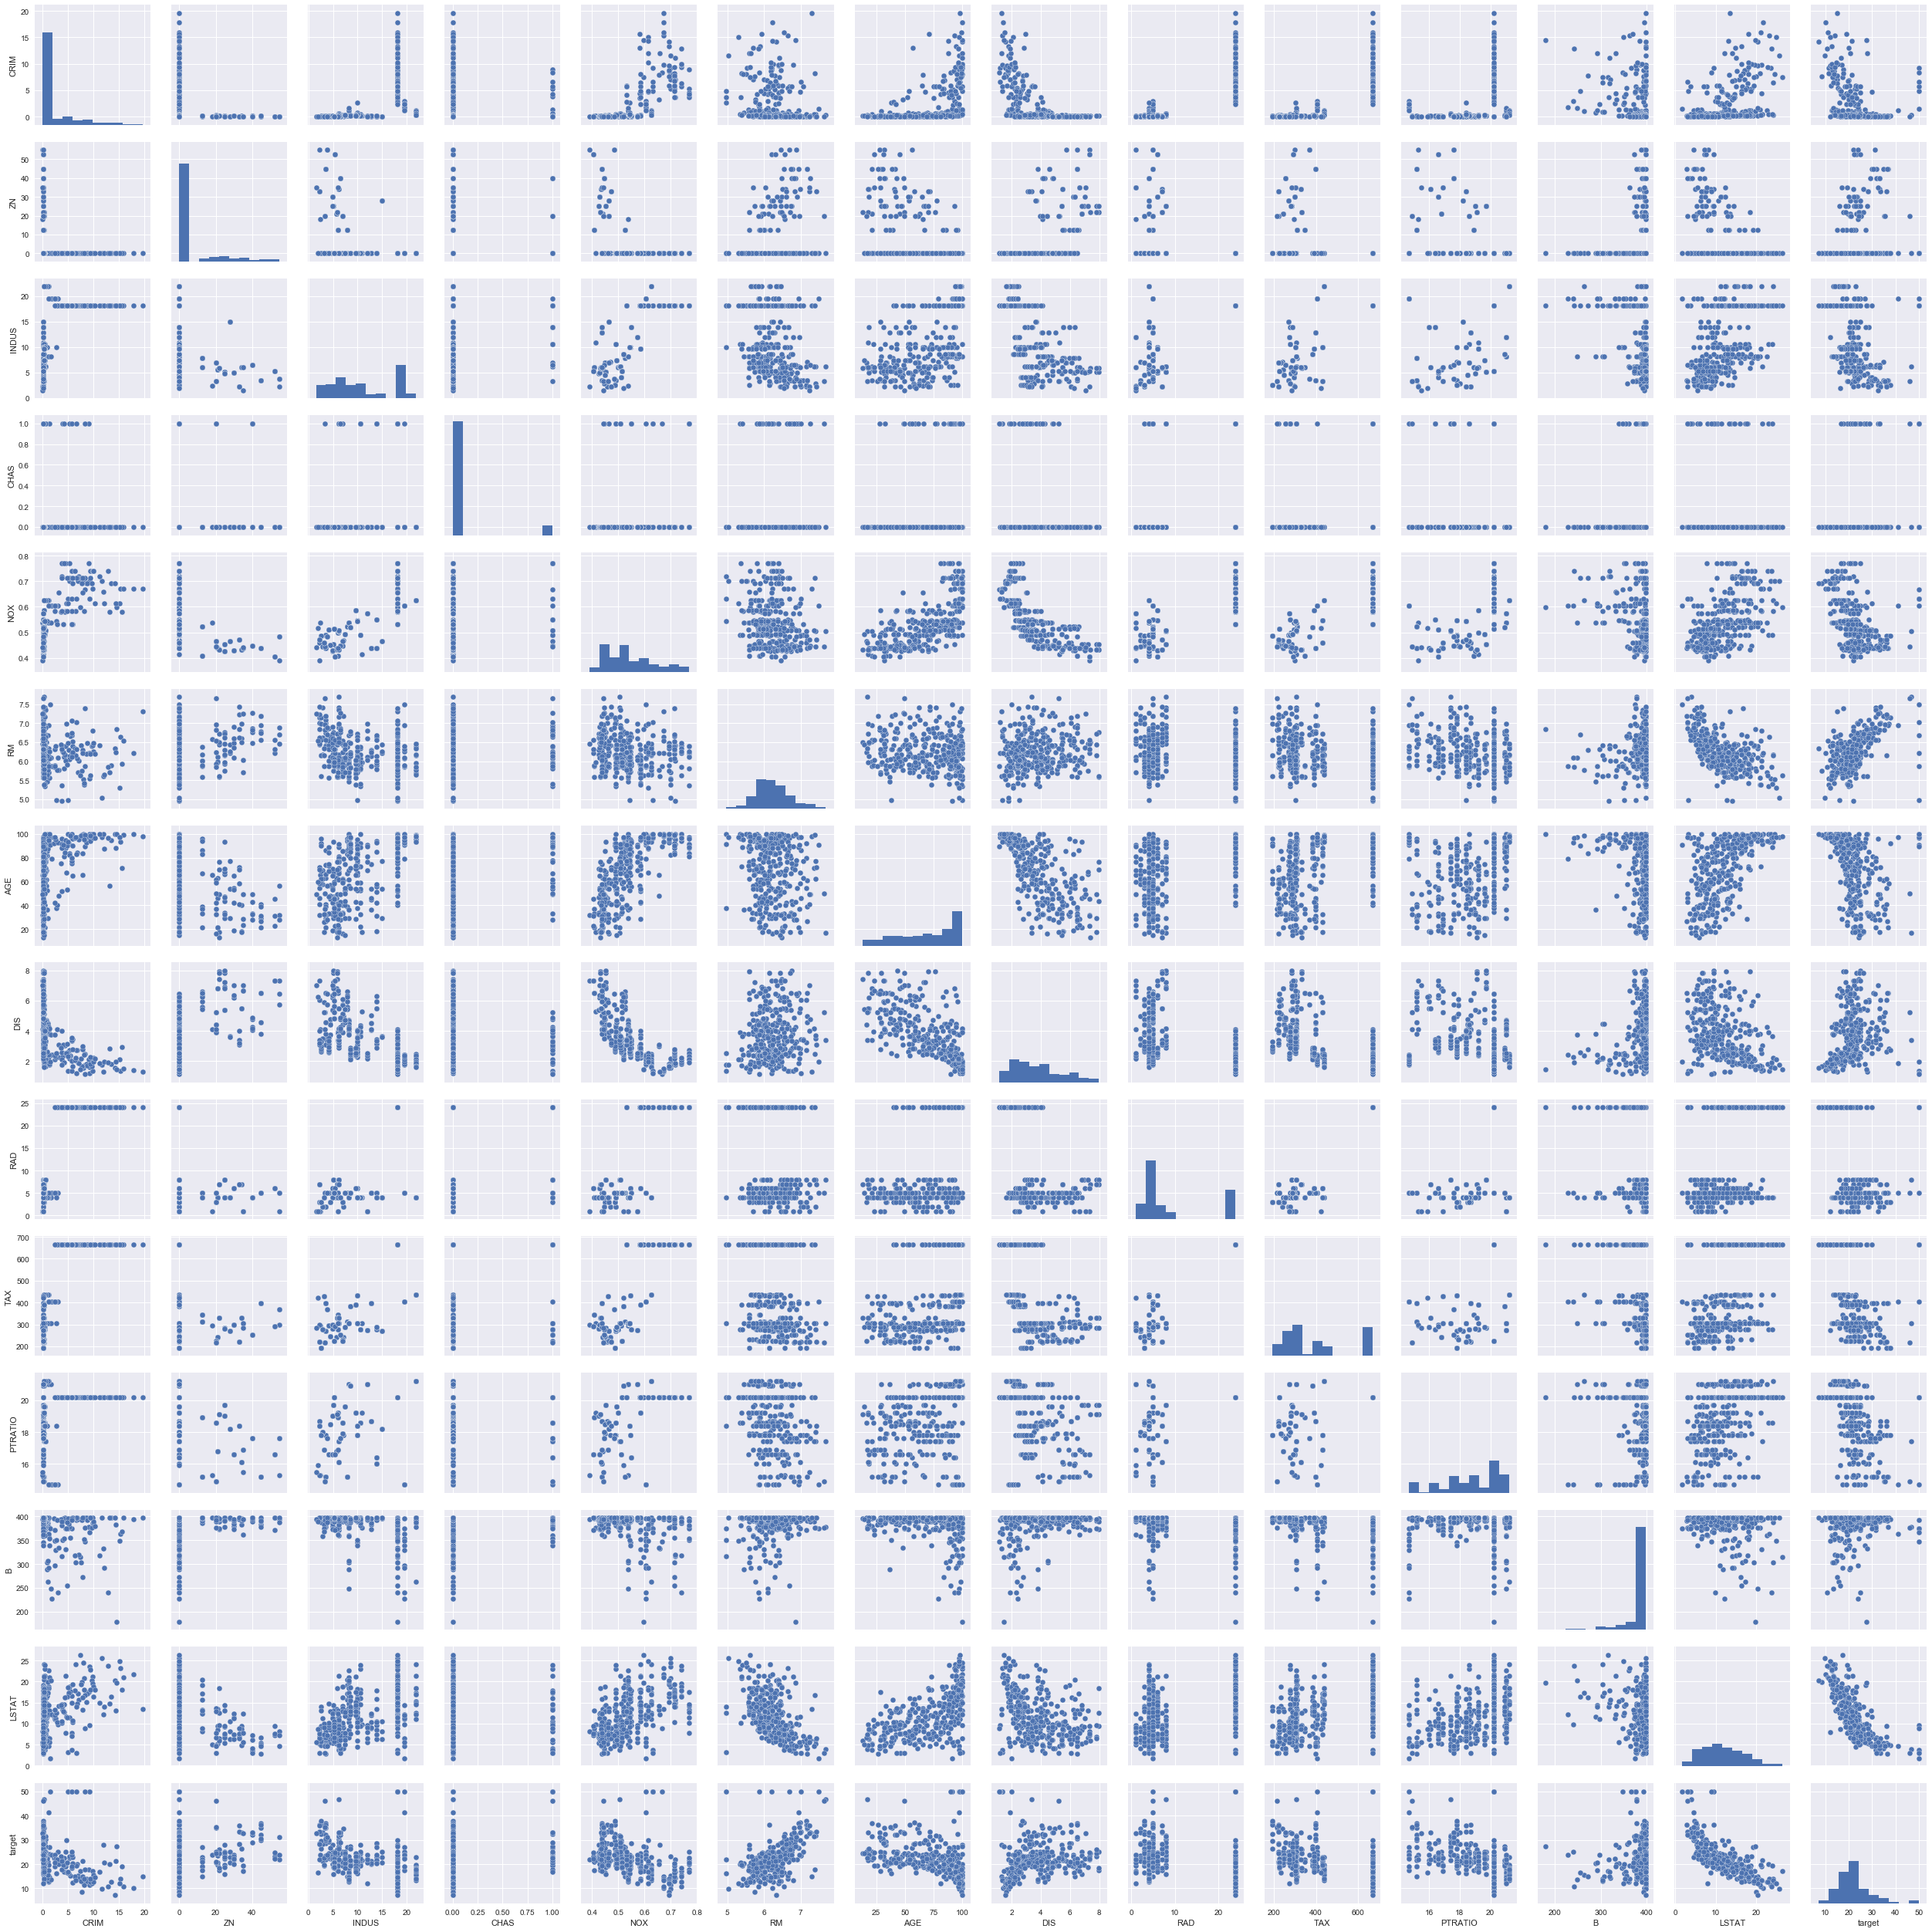

In [23]:
# lets repeat some of the graphics
sns.pairplot(df_boston)
plt.show()

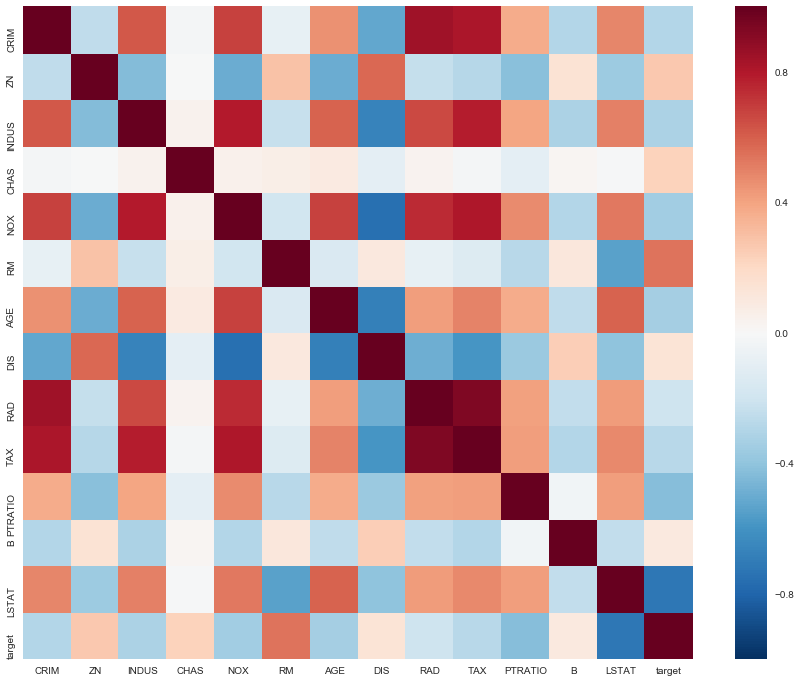

In [24]:
# and
corr = df_boston.corr()
fig, ax = plt.subplots(figsize=(15,12))
heat_map = sns.heatmap(corr)
plt.show()

In [25]:
# and the corr figures
print(corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.254789  0.624267 -0.019404  0.686322 -0.085234  0.458911   
ZN      -0.254789  1.000000 -0.430425 -0.000808 -0.497227  0.292898 -0.493627   
INDUS    0.624267 -0.430425  1.000000  0.040684  0.793443 -0.228151  0.586617   
CHAS    -0.019404 -0.000808  0.040684  1.000000  0.047676  0.064058  0.086997   
NOX      0.686322 -0.497227  0.793443  0.047676  1.000000 -0.192270  0.686649   
RM      -0.085234  0.292898 -0.228151  0.064058 -0.192270  1.000000 -0.153021   
AGE      0.458911 -0.493627  0.586617  0.086997  0.686649 -0.153021  1.000000   
DIS     -0.521056  0.577081 -0.665909 -0.095326 -0.755812  0.106267 -0.685265   
RAD      0.850659 -0.235214  0.663380  0.038956  0.746110 -0.083915  0.417867   
TAX      0.815810 -0.285988  0.786121 -0.020856  0.806254 -0.136570  0.493392   
PTRATIO  0.371331 -0.414315  0.397594 -0.100297  0.473149 -0.273887  0.371066   
B       -0.289320  0.144588 

### Normalisation

In [27]:
from sklearn.preprocessing import StandardScaler

# this function loops through columns in a data set and defines a predefined scaler to each
def scale_numeric(data, numeric_columns, scaler):
    for col in numeric_columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

# we can now define the scaler we want to use and apply it to our dataset 

# Other scalers are available see the scikit documentation
scaler = StandardScaler()
df_boston = scale_numeric(df_boston, poss_outlier_columns, scaler)


In [28]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,3.360000e+02,3.360000e+02,3.360000e+02,336.000000,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,336.000000
mean,1.116831e-16,-4.107164e-16,5.833627e-16,0.077381,2.620259e-16,-9.559152e-16,-3.401710e-16,1.387779e-16,-1.049425e-15,-1.804112e-16,-5.841888e-16,-6.400304e-16,9.945748e-17,22.303869
std,1.001491e+00,1.001491e+00,1.001491e+00,0.267593,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,7.063001
min,-5.605811e-01,-4.714454e-01,-1.538504e+00,0.000000,-1.652998e+00,-2.704316e+00,-2.213152e+00,-1.577942e+00,-9.831775e-01,-1.272759e+00,-2.228547e+00,-6.659135e+00,-1.947380e+00,7.200000
25%,-5.391031e-01,-4.714454e-01,-8.026104e-01,0.000000,-8.435786e-01,-6.888456e-01,-8.400545e-01,-7.993523e-01,-6.229292e-01,-7.228595e-01,-6.410800e-01,1.538039e-02,-7.949224e-01,18.475000
50%,-5.028049e-01,-4.714454e-01,-3.650745e-01,0.000000,-1.960433e-01,-1.170095e-01,1.818771e-01,-1.970093e-01,-5.028465e-01,-5.603891e-01,1.800237e-01,3.830053e-01,-1.057499e-01,21.400000
75%,3.882087e-02,-4.714454e-01,1.225056e+00,0.000000,6.781295e-01,5.518109e-01,9.276110e-01,6.224339e-01,-1.425983e-01,2.519631e-01,7.821665e-01,5.005005e-01,6.807797e-01,24.425000
max,4.660341e+00,3.717166e+00,1.856774e+00,1.000000,2.458852e+00,3.068102e+00,1.219592e+00,2.550335e+00,1.778726e+00,1.682953e+00,1.329569e+00,5.005005e-01,2.785226e+00,50.000000


In [29]:
df_boston[0:10]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.560581,0.899373,-1.406827,0.0,-0.044952,0.712921,-0.153506,0.205858,-0.983177,-0.629127,-1.900106,0.500500,-1.323912,24.0
1,-0.554991,-0.471445,-0.613428,0.0,-0.789617,0.386461,0.387053,0.734358,-0.863095,-0.966565,-0.531600,0.500500,-0.525872,21.6
2,-0.554996,-0.471445,-0.613428,0.0,-0.789617,2.006045,-0.315279,0.734358,-0.863095,-0.966565,-0.531600,0.366549,-1.506156,34.7
3,-0.553643,-0.471445,-1.428495,0.0,-0.908332,1.609628,-0.918968,1.394215,-0.743012,-1.091542,-0.038937,0.425791,-1.715258,33.4
4,-0.543874,-0.471445,-1.428495,0.0,-0.908332,1.925490,-0.587531,1.394215,-0.743012,-1.091542,-0.038937,0.500500,-1.256769,36.2
5,-0.554314,-0.471445,-1.428495,0.0,-0.908332,0.405540,-0.409975,1.394215,-0.743012,-1.091542,-0.038937,0.409006,-1.279789,28.7
6,-0.538750,0.480512,-0.480084,0.0,-0.196043,-0.480568,-0.098266,1.091914,-0.502846,-0.535394,-1.954846,0.457715,0.105270,22.9
7,-0.523766,0.480512,-0.480084,0.0,-0.196043,-0.141388,1.065710,1.326910,-0.502846,-0.535394,-1.954846,0.500500,1.394411,27.1
9,-0.516977,0.480512,-0.480084,0.0,-0.196043,-0.497527,0.663250,1.713508,-0.502846,-0.535394,-1.954846,0.165129,1.001147,18.9
10,-0.502368,0.480512,-0.480084,0.0,-0.196043,0.293186,0.994688,1.565642,-0.502846,-0.535394,-1.954846,0.356347,1.643799,15.0


So far all we have been doing is cleaning and preparing the data to make it more acceptable to the algorithm we want to use.

Now we need to make sure that we have suitable data to both create the model and some data to test the model

## Splitting the data

Currently our dataset includes all of the (remaining) rows and each row includes the target column. I.e. the values that we would like the model to predict.

For a Supervised learning method like Regression, we need to provide the learning algorithm with both the predictor columns along with the corresponding target values to enable the model to create and train itself.

We also need to keep some of the dataframe rows back so that after we have created the model we have available data with which to test it


For the names used for the these new dataframes we follow convention and use 'X' to indicate the predictors and 'y' for the target (the predicted).  So we will end up with 4 distinct structures X_train, X_test, y_train and y_test.

Because the need to perform this operation is so common in these supervised learning methods Scikit has its own function to help you.

In [30]:
# first we need to split out the predictors from the targets and put them  into seperate dataframes.

# the predictors
df_boston_X = pd.DataFrame(df_boston,columns=boston_data.feature_names)
df_boston_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.360000e+02,3.360000e+02,3.360000e+02,336.000000,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02,3.360000e+02
mean,1.116831e-16,-4.107164e-16,5.833627e-16,0.077381,2.620259e-16,-9.559152e-16,-3.401710e-16,1.387779e-16,-1.049425e-15,-1.804112e-16,-5.841888e-16,-6.400304e-16,9.945748e-17
std,1.001491e+00,1.001491e+00,1.001491e+00,0.267593,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00,1.001491e+00
min,-5.605811e-01,-4.714454e-01,-1.538504e+00,0.000000,-1.652998e+00,-2.704316e+00,-2.213152e+00,-1.577942e+00,-9.831775e-01,-1.272759e+00,-2.228547e+00,-6.659135e+00,-1.947380e+00
25%,-5.391031e-01,-4.714454e-01,-8.026104e-01,0.000000,-8.435786e-01,-6.888456e-01,-8.400545e-01,-7.993523e-01,-6.229292e-01,-7.228595e-01,-6.410800e-01,1.538039e-02,-7.949224e-01
50%,-5.028049e-01,-4.714454e-01,-3.650745e-01,0.000000,-1.960433e-01,-1.170095e-01,1.818771e-01,-1.970093e-01,-5.028465e-01,-5.603891e-01,1.800237e-01,3.830053e-01,-1.057499e-01
75%,3.882087e-02,-4.714454e-01,1.225056e+00,0.000000,6.781295e-01,5.518109e-01,9.276110e-01,6.224339e-01,-1.425983e-01,2.519631e-01,7.821665e-01,5.005005e-01,6.807797e-01
max,4.660341e+00,3.717166e+00,1.856774e+00,1.000000,2.458852e+00,3.068102e+00,1.219592e+00,2.550335e+00,1.778726e+00,1.682953e+00,1.329569e+00,5.005005e-01,2.785226e+00


In [31]:
# the tagets
df_boston_y = pd.DataFrame(df_boston,columns=['target'])
df_boston_y.describe()

,target
count,336.000000
mean,22.303869
std,7.063001
min,7.200000
25%,18.475000
50%,21.400000
75%,24.425000
max,50.000000


## Now we can use the train_test_split function from sklearn

We need to provide both the predictors and the target dataframes
We also provide a 'test_size' value to indicate the % of the rows to be used for the test datframe. 

Essentially we are going to split up our original dataset into four areas


<img src="Data_split.png" />


** Red area = ** Rows of training features used to generate the model

** Purple area = ** Target values used to generate the model

** Orange area = ** Rows of features used to test the model

** Green area = ** The actual target values from the test data used to evaluate the accuracy of the model 

In [33]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df_boston_X, df_boston_y, test_size = 0.2, random_state = 42)

In [34]:
# get shape of test and training sets that have been created
print('Training Set Row Count: ', X_train.shape[0])
print('Test Set Row Count: ', X_test.shape[0])


Training Set Row Count:  268
Test Set Row Count:  68


## Creating the model

The first step is deciding which algorithm to use. There are more than one Regression algorithms, but we are in fact going to use the lm model from scikit 



In [35]:
from sklearn.linear_model import LinearRegression

# we start by creating an object of the LinearRegression class
lm = LinearRegression()

## Fitting the model

We now need to provide the fit function with the training predictors (X_train) 
and the known taget values (y_train) for these training predictor rows.

In [36]:
lm.fit(X_train, y_train)

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

/Users/katerina/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:539: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Using the model
We now have a model which we can use to predict the taget values for the test predictors (X_test)

In [37]:
Y_pred = lm.predict(X_test)


In [38]:
# A quick check of the reults
print(len(Y_pred))
print(Y_pred)


68
[[ 26.5764257 ]
 [ 14.13007567]
 [ 18.78852477]
 [ 18.00441439]
 [ 13.14144499]
 [ 18.21626698]
 [ 20.66617334]
 [ 13.75036814]
 [ 17.61288474]
 [ 28.09419044]
 [ 27.00958477]
 [ 15.0255295 ]
 [ 12.0181465 ]
 [ 30.51825657]
 [ 21.96432522]
 [ 24.62161807]
 [ 31.84765261]
 [ 26.22882362]
 [ 19.32759198]
 [ 28.5471504 ]
 [ 39.29979233]
 [ 33.32554744]
 [ 26.3279432 ]
 [ 10.81291361]
 [ 23.16100567]
 [ 25.48448518]
 [ 28.24422027]
 [ 11.65311511]
 [ 16.39411177]
 [ 29.34396412]
 [ 22.40300758]
 [ 16.65402766]
 [ 27.93495302]
 [ 28.47525178]
 [ 15.30948001]
 [ 25.42437315]
 [ 14.52960063]
 [ 12.59039418]
 [ 18.57291079]
 [ 19.16125621]
 [ 26.12898693]
 [ 24.27254938]
 [ 27.87576977]
 [ 25.22047438]
 [ 24.5867584 ]
 [ 16.92887212]
 [ 15.14673152]
 [ 23.59025706]
 [ 20.79020312]
 [ 22.4744489 ]
 [ 21.99144856]
 [ 21.27185712]
 [ 33.04520972]
 [ 37.15383247]
 [ 15.33726758]
 [ 29.16555264]
 [ 15.90669072]
 [ 26.87351576]
 [ 14.10658833]
 [ 13.42087515]
 [ 22.51286756]
 [ 21.79862071]
 [ 25

## All that remains is to check - How good is the model?

Bear in mind that this is only *one* model. Even using the same algorithm, changing the training set of predictors and targets could have resulted in a different model, which may have been better or worse than the one we have.

Even so, we need to have some kind of measure of how good we think the model is, or how much confidence we are prepared to place in the model.

In order to do this we need 

In [39]:
from sklearn import metrics

Mean squared error:  16.5436881525
Mean absolute error:  3.10692462449
R^2 :  0.600772642326


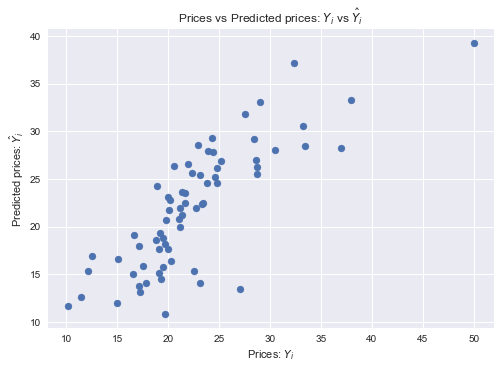

In [40]:

def evaluate(Y_test, Y_pred):
    # this block of code returns all the metrics we are interested in 
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)

    print("Mean squared error: ", mse)
    print("Mean absolute error: ", msa)
    print("R^2 : ", r2)
    
    # this creates a chart plotting predicted and actual 
    plt.scatter(Y_test, Y_pred)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

evaluate(y_test, Y_pred)
